In [11]:
from simulator import Sim
from strategy import GStrategy
from get_info import get_pnl
from load_data import load_md_from_file


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

PATH_TO_FILE =  r'C:\Users\walkr\Documents\HFT\HFT\simulator\data'
# NROWS = 1_000_000
NROWS = 100_000

In [12]:
md = load_md_from_file(path=PATH_TO_FILE, nrows=NROWS)

In [13]:
latency = pd.Timedelta(1, 'ms').delta
md_latency = pd.Timedelta(1, 'ms').delta

sim = Sim(md, latency, md_latency)

In [14]:
#delay between orders
delay = pd.Timedelta(0.1, 's').delta

hold_time = pd.Timedelta(17, 's').delta

strategy = GStrategy(delay, hold_time)

In [15]:
%time trades_list, md_list, updates_list, all_orders = strategy.run(sim)

C:\Users\walkr\Documents\HFT_GIT\strategy.py:371: RuntimeWarning: divide by zero encountered in log
  if np.isnan(np.sign(S - np.log(self.a*Y))):
C:\Users\walkr\Documents\HFT_GIT\strategy.py:374: RuntimeWarning: divide by zero encountered in log
  return np.sign(S - np.log(self.a*Y))
C:\Users\walkr\Documents\HFT_GIT\strategy.py:380: RuntimeWarning: divide by zero encountered in log
  if np.isnan(np.sign(S - np.log(-self.a*Y))):
C:\Users\walkr\Documents\HFT_GIT\strategy.py:383: RuntimeWarning: divide by zero encountered in log
  return np.sign(S - np.log(-self.a*Y))
C:\Users\walkr\Documents\HFT_GIT\strategy.py:380: RuntimeWarning: invalid value encountered in log
  if np.isnan(np.sign(S - np.log(-self.a*Y))):
C:\Users\walkr\Documents\HFT_GIT\strategy.py:371: RuntimeWarning: invalid value encountered in log
  if np.isnan(np.sign(S - np.log(self.a*Y))):


CPU times: total: 15.8 s
Wall time: 17.5 s


In [16]:
%time df = get_pnl(updates_list)

CPU times: total: 30.5 s
Wall time: 33.2 s


In [17]:
dt = pd.to_datetime(df.receive_ts)

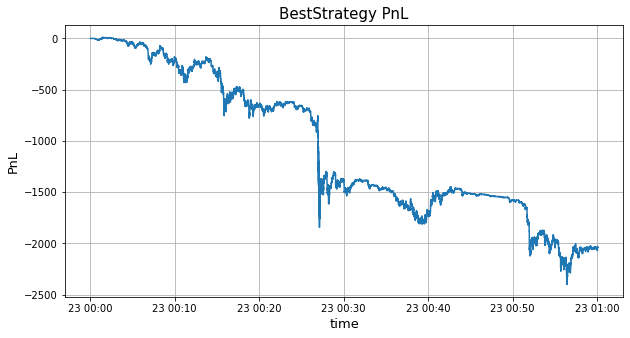

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("BestStrategy PnL", fontsize=15)
plt.grid()
plt.show()